Matemática Computacional III - UFSM - 2023/1

# Equações Diferenciais Ordinárias

<br>

Na aula passada, estudamos como aproximar a solução de uma EDO através do método de Euler. Hoje vamos generalizá-lo estudando os métodos de Taylor.

<br>

## Métodos de Taylor

Consideremos o problema de valor inicial (PVI) descrito por
$$\begin{cases}
   y' = f(x,y) \\
   y(x_0) = y_0
  \end{cases}$$

Supondo que a solução $y(x)$ do PVI possui todas as derivadas contínuas no intervalo $[a,b]$ que contém os pontos de discretização $x_0$,$x_1$,...,$x_n$ , o desenvolvimento em série de Taylor da função $y(x)$ em torno do ponto $x_n$ é dado por

$$ y(x) = y(x_0) + y'(x_0)(x−x_0) + y''(x_0)\frac{(x-x_0)^2}{2!}+...+y^{(p)}(x_0)\frac{(x-x_0)^p}{p!}+y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!},$$

onde $\xi$ é algum número real satisfazendo $ x_0<\xi<x$.

<br>

Note que truncando a série de Taylor no segundo termo, obtemos exatamente a aproximação utilizada no **Método de Euler**:

$$ y(x) \approx y(x_0) + y'(x_0)(x-x_0).$$

Assim, O método de Euler pode ser entendido como um método de Taylor de ordem $p=1$.

<br>
***
<br>

Porém, agora podemos generalizá-lo, considerando mais termos da série de Taylor.

Denotando $x = x_0 + h$, temos $h = x−x_0$. Assim, escrevendo a expressão com $p=2$, obtemos:

$$ y(x) = y(x_0) + y'(x_0)h + y''(x_0)\frac{h^2}{2!}+y^{(3)}(\xi)\frac{(x-\xi)^{3}}{(3)!}$$.


Se truncarmos a série de Taylor no segundo termo, obtemos a aproximação dada pelo **Método de Taylor de ordem 2**,

$$ y(x) = y(x_0) + y'(x_0)h + y''(x_0)\frac{h^2}{2!},$$

com um **erro de truncamento** dado pelo último termo, que foi descartado:

$$e(x)=y^{(3)}(\xi)\frac{(x-\xi)^{3}}{(3)!}.$$

<br><br>

Assim, usando a série de Taylor, podemos calcular aproximações para $y(x)$ nos pontos $x_0, x_1, \ldots, x_n$ da seguinte forma:

$$ y(x_{i+1}) \approx y(x_{i}) + y'(x_i)h + y''(x_i)\frac{h^2}{2!}$$

onde $ y'$ e $ y''$ são obtidos através da equação diferencial e $y(x_0)$ é o valor inicial fornecido.

<br>

***
<br>

## Controlando o erro cometido a cada passo

Se a função $y(x)$ possui a derivada de ordem $3$ contínua no intervalo $[a,b]$, então existe $M = max \left\{ \left|y^{(3)}(x)\right|, x \in [a,b] \right\}$, e temos uma **estimativa para o erro**:

$$ |E| \leq \frac{h^{3}}{(3)!}M.$$

Note que essa é uma estimativa para o erro cometido cada vez que estimamos $y(x_{i+1})$ a partir do valor **exato** de $y(x_i)$.

Ou seja, como a partir do primeiro ponto o valor de $y(x_i)$ também é aproximado, obtemos **aproximações baseadas em aproximações**, portanto o erro total cometido vai aumentando de um ponto para o outro.

<br>

***
<br><br>

## Exercício 1
Use o método de Taylor de ordem 2 para resolver numericamente a equação:

$$ \begin {cases}
   \frac{dy}{dx} = x-y+2 \\
    y(0)=2
    \end{cases}$$

entre $x = 0$ e $x = 1$ com $N = 5$ subintervalo. Compare os valores e plote o resultado considerando a solução exata $y(x)=e^{-x} + x + 1$.

<br>

### Solução:

Precisamos usar a fórmula de recorrência

$$ y(x_{n+1}) = y(x_n) + y'(x_n)h + y''(x_n)\frac{h^2}{2!}, $$

onde

$$ y' = x - y + 2 $$

$$ y'' = (x - y + 2)' = 1-y' = 1-(x-y+2) = -x+y-1.$$

Então

\begin{align}
y(x_{n+1}) &= y(x_n) + y'(x_n)h + y''(x_n)\frac{h^2}{2!}\\
&= y(x_n) + [x_n - y(x_n) + 2]h + [-x_n+y(x_n)-1] \frac{h^2}{2}
\end{align}

Vamos agora modificar o código do método de Euler para calcular essa aproximação.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

----------------------------------------------------------
Instante: 0.0 . Valor aproximado de y: 2
Instante: 0.2 . Valor aproximado de y: 2.02
Instante: 0.4 . Valor aproximado de y: 2.0724
Instante: 0.6000000000000001 . Valor aproximado de y: 2.1513679999999997
Instante: 0.8 . Valor aproximado de y: 2.2521217599999996
----------------------------------------------------------


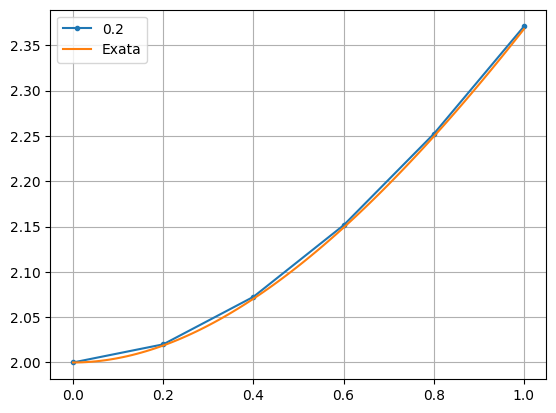

In [15]:
# copie aqui os códigos da aula passada necessários e modifique-os para implementar o Método de Taylor de ordem 2
# se necessário, utilize mais células para organizar melhor o código

h = (1-0)/5 #separa os subintervalos

xi = np.arange(0, 1+h, h)#cria um array com os passos indo de 0 até 1. Como por padrão,o ultimo elemento não é inserido no array, adiciona-se o passo para adicionar o ultimo elemento.

yi = [2]#valor inicial de yi
print ('----------------------------------------------------------')

for x in xi[:-1]:# percorre a lista xi indo do item 0 até o penultimo item.
    print ('Instante:', x, '. Valor aproximado de y:', yi[-1])
    y = yi[-1] + (x - yi[-1] + 2)*h +(-x + yi[-1] - 1)*((h**2)/np.math.factorial(2)) #Calcula o valor de y no instante x da interação
    yi.append(y) #coloca o valor de y calculado no yi
plt.plot(xi, yi, ".-", label=h) #plota o gráfico yi x xi
print ('----------------------------------------------------------')

dom = np.linspace(0, 1, 100) #separa 100 valores igualmente espaçados entre 0 e 1
plt.plot(dom, (np.exp(-dom) + dom +1), "-", label='Exata') #plota o valor analítico
plt.grid()
plt.legend()
plt.show()

<br><br><br>

**Para estimar o erro cometido**, precisamos calcular

$$M = max \left\{ \left|y^{(3)}(x)\right|, x \in [0,1] \right\}.$$

Como a solução exata é $y(x)=e^x - x + 1$, vamos derivar computacionalmente essa função três vezes.

In [6]:
import sympy as sp
sp.init_printing()

x = sp.symbols('x') #Define x como um elemento simpy
y = sp.exp(x)-x+1        # define a função y
d1 = y.diff(x) #derivada primeira
d2 = d1.diff(x)#derivada segunda
d3 = d2.diff(x)#derivada terceira
print('A derivada terceira é', d3)

A derivada terceira é exp(x)


Assim, buscamos $M = max \left\{ | e^x |, x \in [0,1] \right\}$. Vamos plotar essa função nesse intervalo para verificarmos o valor máximo atingido.

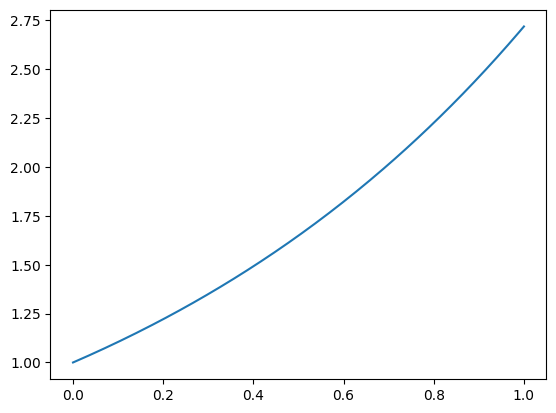

In [7]:
import matplotlib.pyplot as plt
import numpy as np
dom = np.linspace(0, 1, 200)
plt.plot(dom, np.exp(dom))
plt.show()

Assim, vemos que o máximo atingido no intervalo é $M = 2.75$ e podemos calcular uma estimativa para o erro.

In [8]:
# calcule o valor numérico da estimativa para o erro cometido
m = 2.75 #valor máximo
e= m*(h**3)/np.math.factorial(3) #calcula o erro
print('O erro estimado é ', e)

O erro estimado é  0.0036666666666666675


<br><br><br>

***
<br><br><br>

## Exercício 2

Resolver numericamente a equação abaixo usando o método de Taylor com $p=2$:

$$ \begin {cases}
   \frac{dy}{dx} = -xy \\
    y(1)=1
    \end{cases}$$

entre $x = 1$ e $x = 2.8$ com $N = 3$ subintervalos. Compare os valores e plote o resultado considerando a solução exata $y(x)=e^{\frac{1-x^2}{2}}$.

<br>
<br>

### Solução:

Precisamos utilizar as funções

$$ y' = -xyy(1) $$

e

$$ y'' = -yy(1). $$

Então a aproximação dada pelo método de Taylor é

$$ y(x_{n+1}) = y(x) + [-xyy(1)]h+[-yy(1)]\frac{h^2}{2}. $$

----------------------------------------------------------
Instante: 1.0 . Valor aproximado de y: 1
Instante: 1.3333333333333333 . Valor aproximado de y: 0.6111111111111112
Instante: 1.6666666666666665 . Valor aproximado de y: 0.30555555555555564
Instante: 1.9999999999999998 . Valor aproximado de y: 0.11882716049382723
Instante: 2.333333333333333 . Valor aproximado de y: 0.0330075445816187
Instante: 2.666666666666666 . Valor aproximado de y: 0.005501257430269787
----------------------------------------------------------


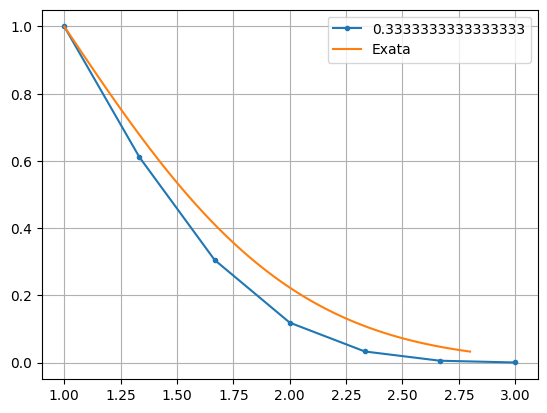

In [9]:
# copie aqui os códigos para resolver a equação e plotar o gráfico da solução aproximada e da solução exata

# copie aqui os códigos da aula passada necessários e modifique-os para implementar o Método de Taylor de ordem 2
# se necessário, utilize mais células para organizar melhor o código

h = (1-0)/3

xi = np.arange(1, 2.8+h, h)

yi = [1]
print ('----------------------------------------------------------')

for x in xi[:-1]:
    print ('Instante:', x, '. Valor aproximado de y:', yi[-1])
    y = yi[-1] + (-x*yi[-1]*1)*h +(-yi[-1]*1)*((h**2)/2)
    yi.append(y)
plt.plot(xi, yi, ".-", label=h)
print ('----------------------------------------------------------')

dom = np.linspace(1, 2.8, 100)
plt.plot(dom, np.exp((1-dom**2)/2), "-", label='Exata')
plt.grid()
plt.legend()
plt.show()

In [10]:
# copie aqui os códigos para estimar o erro cometido
import sympy as sp
sp.init_printing()

x = sp.symbols('x')
y = sp.exp((1-x**2)/2)      # defina aqui a função y
d1 = y.diff(x)
d2 = d1.diff(x)
d3 = d2.diff(x)
print('A derivada terceira é', d3)


A derivada terceira é -x**3*exp(1/2 - x**2/2) + 3*x*exp(1/2 - x**2/2)


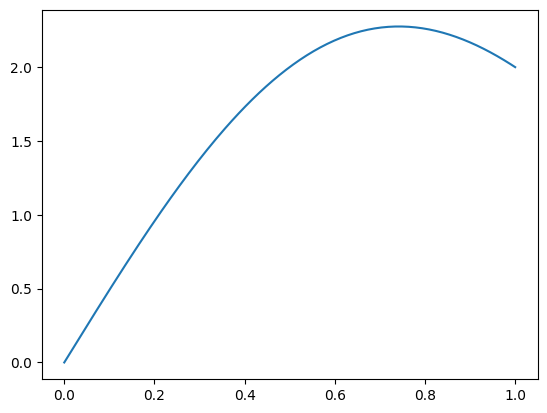

2.275417619888736


In [11]:
# calcule o valor numérico da estimativa para o erro cometido
dom = np.linspace(0, 1, 200)

plt.plot(dom, -dom**3*np.exp(1/2 - dom**2/2) + 3*dom*np.exp(1/2 - dom**2/2))
plt.show()
print(max(-dom**3*np.exp(1/2 - dom**2/2) + 3*dom*np.exp(1/2 - dom**2/2)))

In [12]:
m = max(-dom**3*np.exp(1/2 - dom**2/2) + 3*dom*np.exp(1/2 - dom**2/2))
e= m*(h**3)/np.math.factorial(3)
print('O erro estimado é ', e)

O erro estimado é  0.014045787777090958


Utilize o código da aula passada e compare o desempenho do método de Euler com o método de Taylor de ordem 2.

----------------------------------------------------------
Instante: 1.0 . Valor aproximado de v: 1
Instante: 1.3333333333333333 . Valor aproximado de v: 0.6666666666666667
Instante: 1.6666666666666665 . Valor aproximado de v: 0.37037037037037046
Instante: 1.9999999999999998 . Valor aproximado de v: 0.16460905349794247
Instante: 2.333333333333333 . Valor aproximado de v: 0.054869684499314175
Instante: 2.666666666666666 . Valor aproximado de v: 0.01219326322206983
----------------------------------------------------------
Instante: 1.0 . Valor aproximado de y: 1
Instante: 1.3333333333333333 . Valor aproximado de y: 0.6111111111111112
Instante: 1.6666666666666665 . Valor aproximado de y: 0.30555555555555564
Instante: 1.9999999999999998 . Valor aproximado de y: 0.11882716049382723
Instante: 2.333333333333333 . Valor aproximado de y: 0.0330075445816187
Instante: 2.666666666666666 . Valor aproximado de y: 0.005501257430269787
----------------------------------------------------------


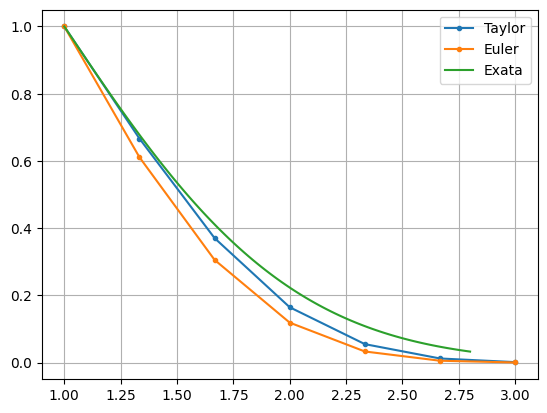

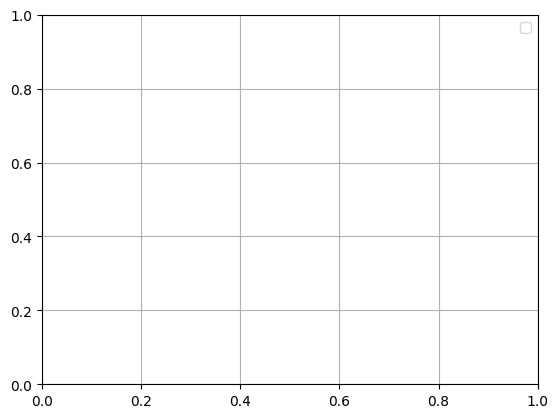

In [13]:
# modifique o código anterior aqui
passo = (1-0)/3 #divide em 3 subintervalos
ti = np.arange(1, 2.8+passo, passo) # cria uma lista indo de 1 até 2.8+passo com uma distância entre pontos dado pelo passo

zi = [1] #lista de soluções. a condição inicial é y(0)=1 por isso o primeiro item é 1
print ('----------------------------------------------------------')
for t in ti[:-1]:    # laço for que calcula z para cada interação
    print ('Instante:', t, '. Valor aproximado de v:', zi[-1])
    z = zi[-1] + (-t*zi[-1]*zi[0])*passo
    zi.append(z) #coloca o z calculado em zi

plt.plot(ti, zi, ".-", label='Taylor') #plota o vetor zi para cada ti
h = (1-0)/3

xi = np.arange(1, 2.8+h, h)

yi = [1]
print ('----------------------------------------------------------')

for x in xi[:-1]:
    print ('Instante:', x, '. Valor aproximado de y:', yi[-1])
    y = yi[-1] + (-x*yi[-1]*1)*h +(-yi[-1]*1)*((h**2)/2)
    yi.append(y)
print ('----------------------------------------------------------')

plt.plot(xi, yi, ".-", label='Euler')
dom = np.linspace(1, 2.8, 100)
plt.plot(dom, np.exp((1-dom**2)/2), "-", label='Exata')
plt.grid()
plt.legend()
plt.show()
plt.grid()
plt.legend()
plt.show()

<br><br><br><br>

### Descreva aqui com suas palavras como funciona o método de Taylor de ordem 2:

COMPLETE